In [1]:
from NTT_Core import number_theoretic_transform, flip_index_ntt
import numpy as np

In [2]:
def multi_ntt_rand_seq(seqs, pm = 3 * 2**41 + 1, flip_prob = 0):
    #assert np.max(seqs) < pm
    #seqs = np.random.randint(scale, size = [layers_count+1, seq_len])
    #print("Datashape", seqs.shape)
    temp = seqs[0]
    for i in range(1,len(seqs)):
        temp = ntt_poly_mul(temp, seqs[i], pm=pm, flip_pos=flip_pos)
        #print('Mult ', i+1)
    return temp

def test_multi_layers_ham(layers, pm, scale, flip_prob, draw = True):
    #polynominals = np.random.randint(200, size = [5, 50])
    polynominals = np.array([[101, 106, 158,  74,   8,  51,   6,  94,  61, 185, 107, 195, 196,
        185,  49,  89,  36, 195, 111, 170,  34, 136, 136,  39,   8, 137,
          3, 117, 173, 155,  66,  82, 181, 142, 103,   1, 185, 181,  86,
        138,  28, 152, 138,  51,  34, 170, 103,  80,  65, 131],
       [ 48, 128,  22,  66, 175,  89,  56,  29,  31, 150, 145, 110, 101,
         31,  64,  43,  54,  36,  17,  44, 133,  99,  70,   4, 181, 106,
         93, 165, 102,  94,  28,  60, 150,  62,  57,  25,  67, 181,  49,
         23, 161, 195,  66, 177,  30, 187,  78,  41, 135, 147],
       [ 75,  14, 106, 199, 121, 169, 138, 145,  23,  66, 197,   1, 115,
         19,   7, 155,  33, 129, 144, 187, 142, 153,   7, 132,  95, 171,
         29,  21, 151, 120, 169, 114, 103,  34, 177,  65, 119,  56,  75,
          0, 196, 175, 182, 198, 104,   1,  60, 169, 191,  45],
       [ 69,  95, 106, 187,  93,  86, 138,  85,  99,  22, 158, 184, 190,
        197, 192, 142, 140, 104,  81,  58, 199, 183,  29, 184, 188,  42,
        109, 182, 179, 145, 102, 160, 109,  17,  99, 195, 154,  34, 173,
        145, 180,  17,   9,  28, 136, 141, 188,  34,  18,   4],
       [105, 161, 133, 164, 123, 185,  37, 176,   2,  95, 147, 102,  81,
         77,  13, 149, 160,  48,  99,  37,  23,  81,   7, 104, 101,  97,
        119,  36,  77, 162, 137,  68, 167, 134, 124,  96,  72, 172,  33,
         56, 196, 133, 137, 154,  36,  40, 162, 186,  46,  30]])
    epochs = 500
    samples = []
    ham_errors = []
    correct = multi_ntt_rand_seq(polynominals,  pm, flip_prob = 0)
    print(correct)
    for _ in range(epochs):
        res = multi_ntt_rand_seq(polynominals, pm, flip_prob= flip_prob)
        samples.append(res)
        ham_errors.append(hamming_distance_vector(correct, res))
    samples = np.array(samples)
    ham_errors = np.array(ham_errors)

    if draw:
        fig, ax = plt.subplots(2,dpi=200, figsize=(15,6))
        ax[0].plot(samples.T, alpha=0.3, c='blue')
        ax[0].plot(correct, c='Red')
        #ax[1].plot(np.mean(ham_errors.T,axis=1), c='blue')
        ax[1].boxplot(ham_errors)
        ax[1].plot(np.mean(ham_errors.T,axis=1), c='red')
        ax[0].set_title('Layers:{} PM:{} Scale:{} Flip_prob:{}'.format(layers, pm, scale, flip_prob))
        plt.tight_layout()
        plt.show()
    return samples, np.array(correct)

In [3]:
np.random.randint(512, size = [1, 50])

array([[359, 121, 151, 218, 306,   1, 186, 159, 351, 288, 411, 326,  11,
         17, 370, 466, 293, 418, 173,  77, 165, 455, 268, 256, 345, 185,
        127, 214, 206, 195, 502, 344, 144, 210,  80,  97, 365,  59, 199,
        243,  69,  45, 473, 167, 347,  69, 198,  98,  99, 286]])

In [4]:
polynominal_seq = np.array([165,  53, 332, 482, 150, 504, 488, 420, 136, 360, 239, 155, 487,
        149, 281,  27, 440, 128, 446, 324, 418,  86, 460, 422, 167, 425,
         37, 400, 107, 318, 322, 184, 506, 442,  99, 486, 189, 197, 369,
         76, 398, 168, 450, 266, 499, 353, 325, 268,  65, 171])

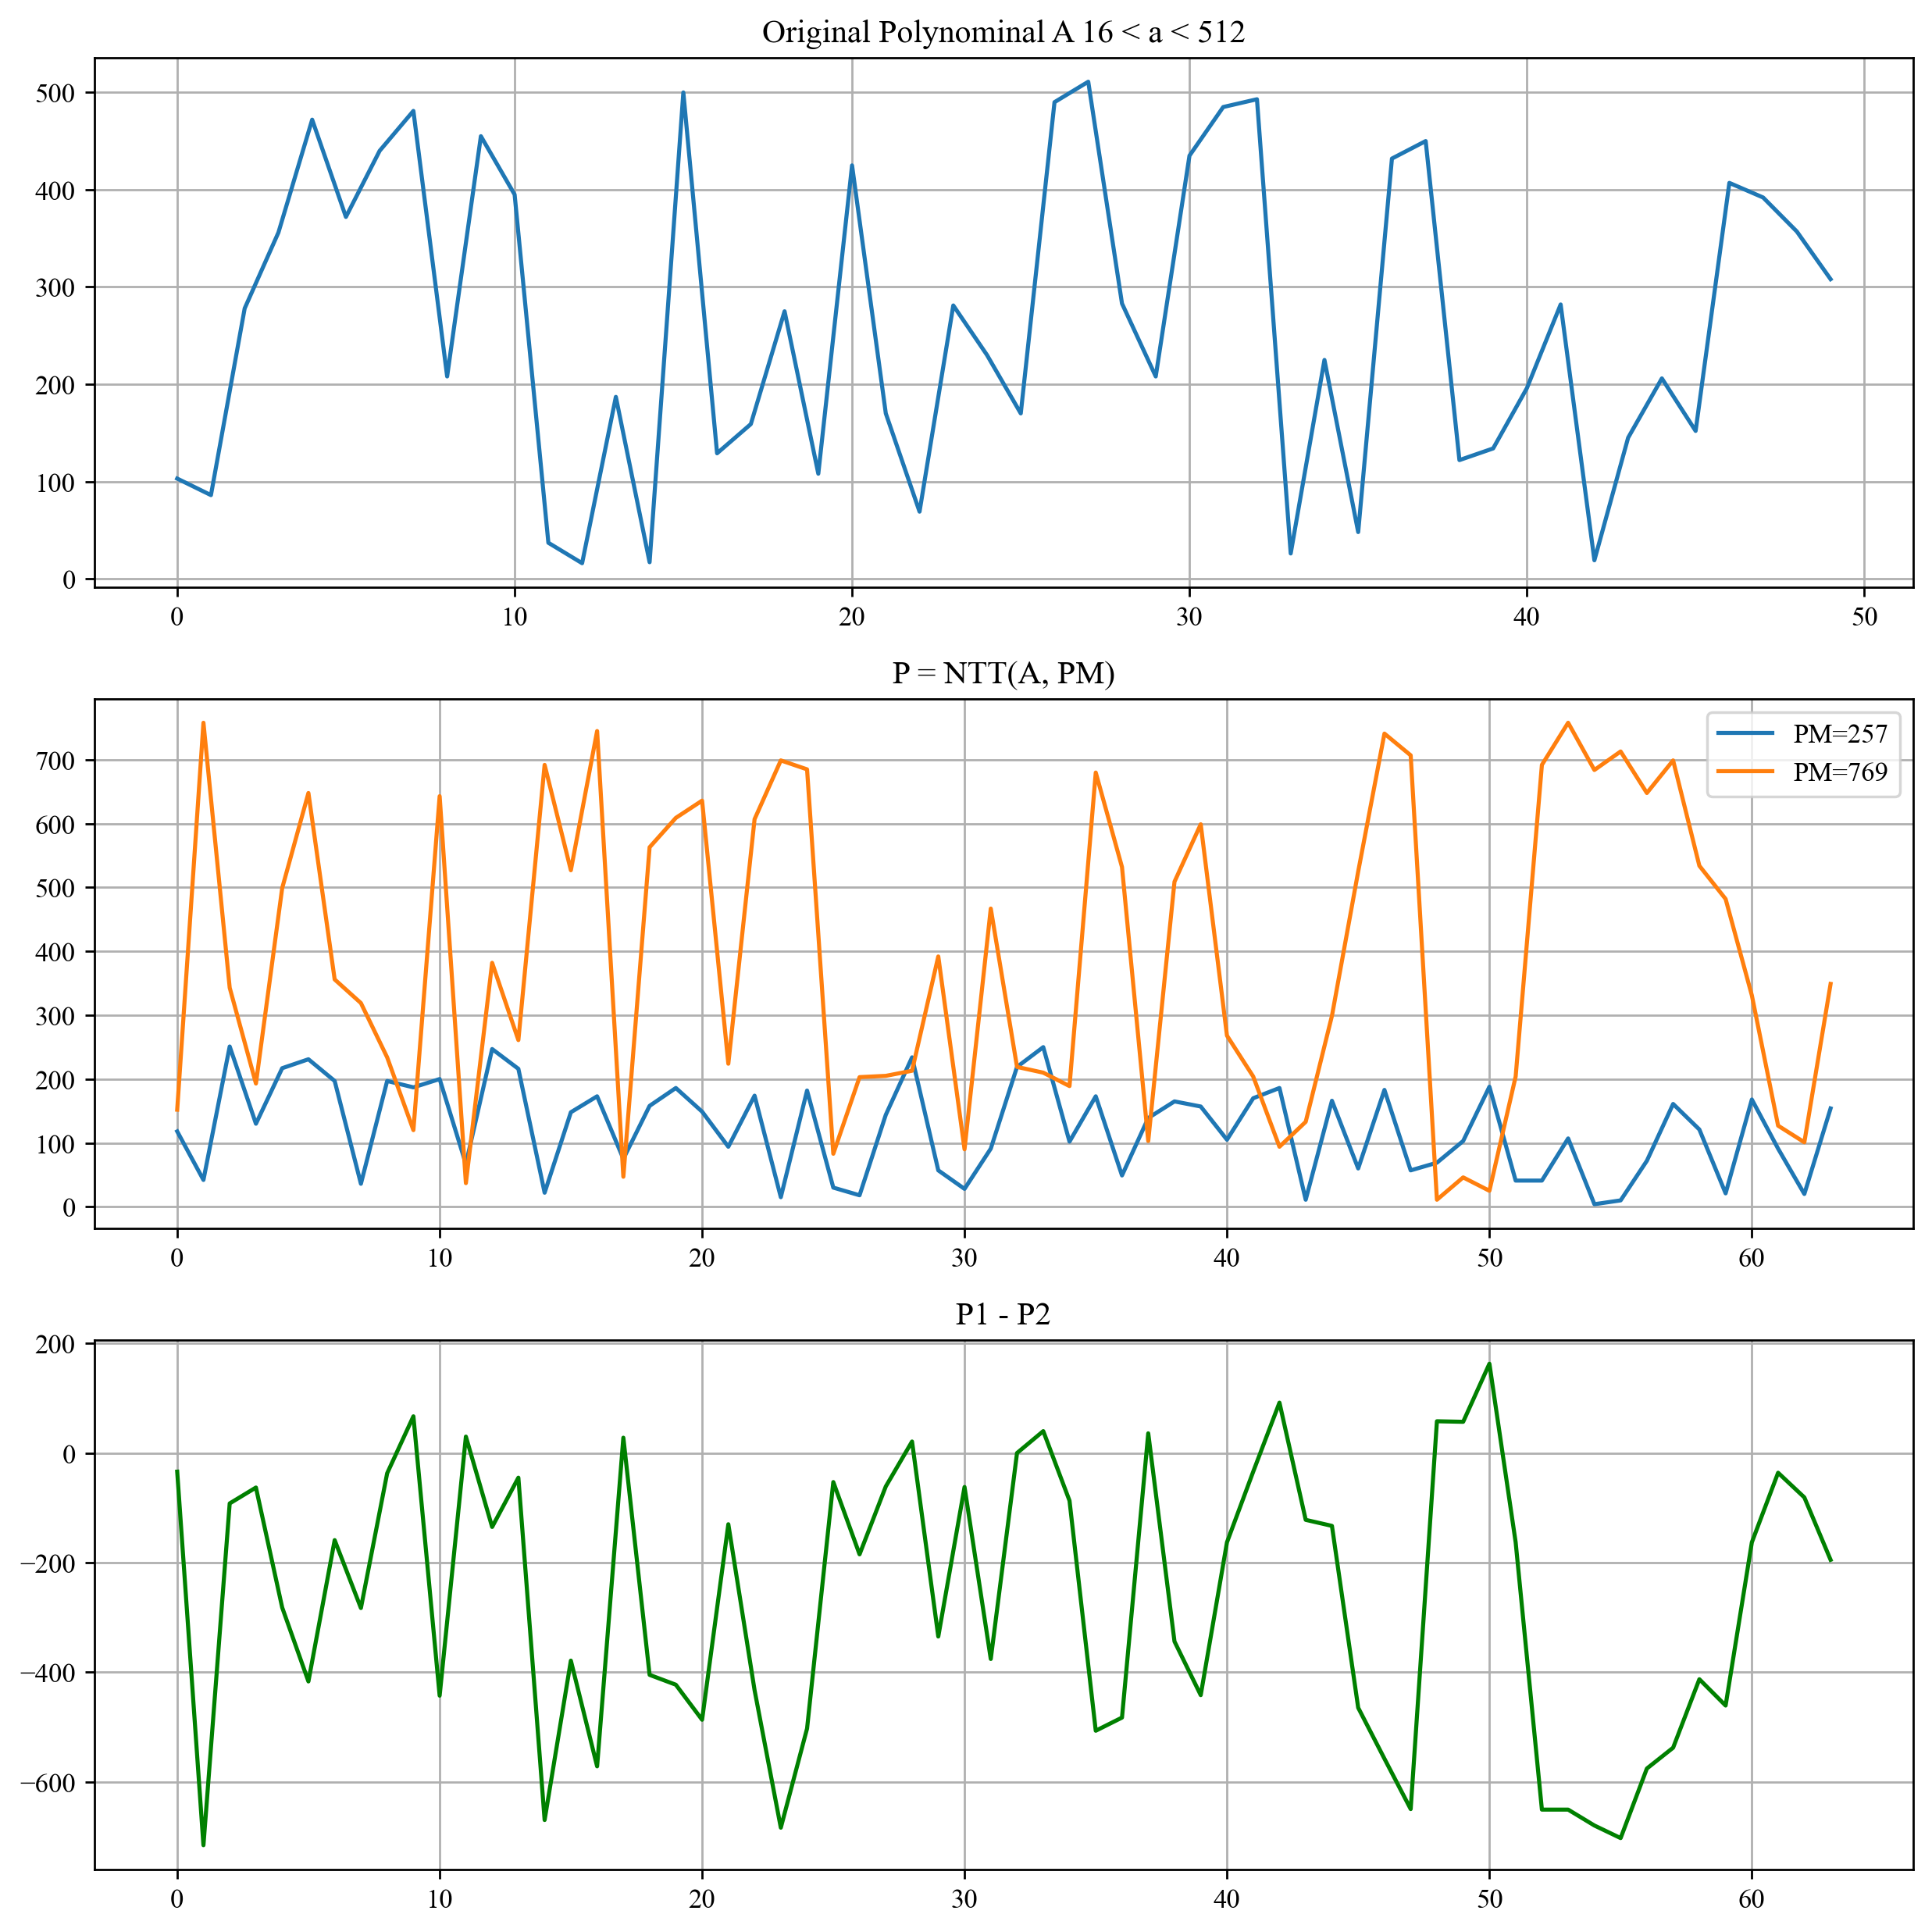

In [5]:
import matplotlib.pyplot as plt
polynominal_seq = (np.random.randint(512-16, size = [1, 50])+16)[0]
plt.rc('font',family='Times New Roman')

p1 = np.array(number_theoretic_transform(polynominal_seq, 257, log=False))
p2 = np.array(number_theoretic_transform(polynominal_seq, 769, log=False))
fig, ax = plt.subplots(3,dpi=250,figsize=[10,10])
ax[0].plot(polynominal_seq)
ax[0].set_title("Original Polynominal A 16 < a < 512")
ax[0].grid()
ax[1].plot(p1, label = "PM=257")
ax[1].plot(p2, label = "PM=769")
ax[1].set_title("P = NTT(A, PM)")
ax[1].grid()
ax[1].legend()
ax[2].plot(p1 - p2, c = 'Green')
ax[2].set_title("P1 - P2")
ax[2].grid()

plt.tight_layout()

Previous 398
110001110 --> 110000110
After 390
1011111111111111111111111111111111111001111 --> 1011111111111111111111111111111111111000111
Previous 496
111110000 --> 111111000
After 504
1011111111111111111111111111111111101001101 --> 1011111111111111111111111111111111101000101
Previous 588
1001001100 --> 1001000100
After 580
1011111111111111111111111111111111100000111 --> 1011111111111111111111111111111111100001111
Previous 60
111100 --> 110100
After 52
111100 --> 110100
Previous 377
101111001 --> 101110001
After 369
1000011 --> 1001011


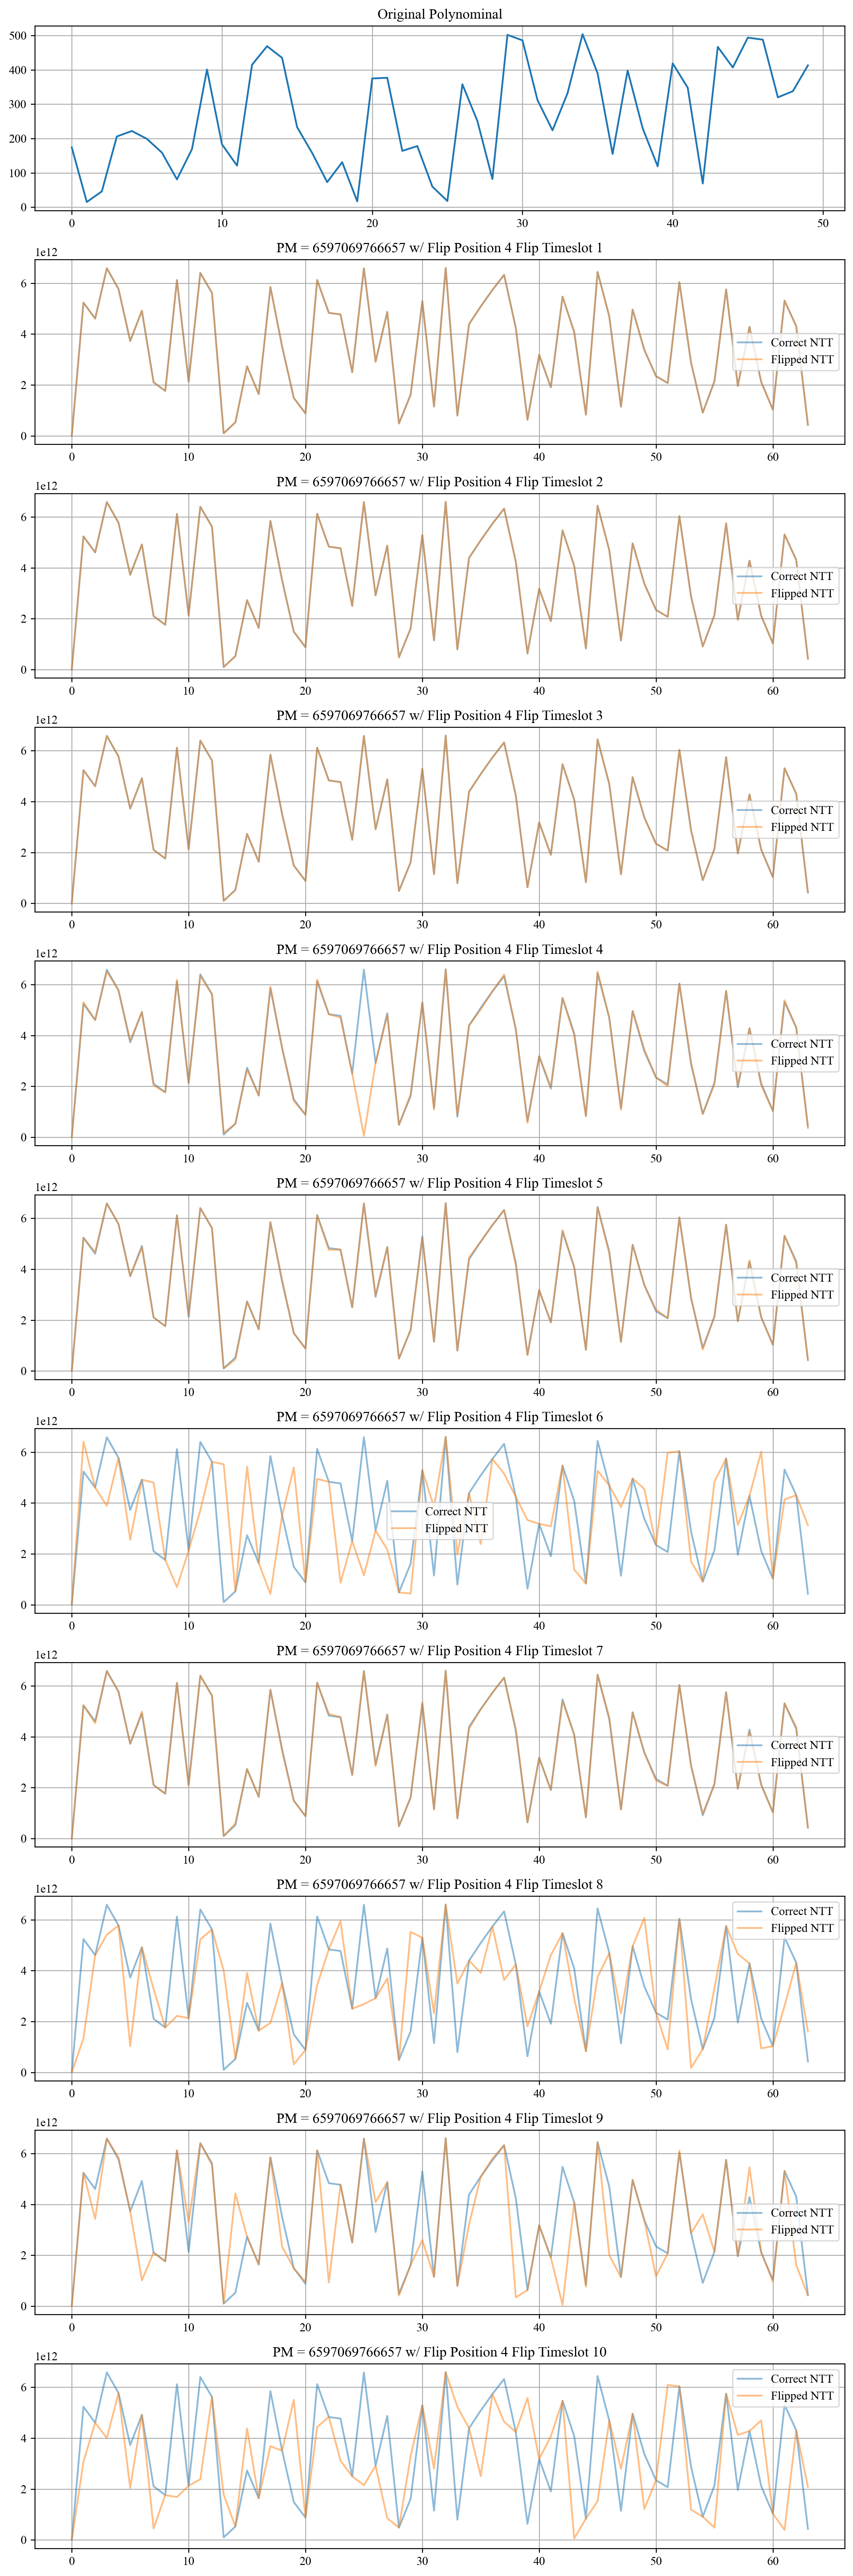

In [25]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
flip_pos = 4
flip_time_scale = 10
PM = 3 * 2**41 + 1
polynominal_seq = (np.random.randint(512, size = [1, 50]))[0]
fig, ax = plt.subplots(flip_time_scale + 1, dpi=250, figsize=[10,3*flip_time_scale])
ax[0].set_title('Original Polynominal')
ax[0].plot(polynominal_seq)
ax[0].grid()
for i in range(1,flip_time_scale+1):
    ax[i].set_title('PM = {} w/ Flip Position {} Flip Timeslot {}'.format(PM, flip_pos, i))
    ax[i].grid()
    ax[i].plot(number_theoretic_transform(polynominal_seq, PM, log = False), label = 'Correct NTT', alpha=0.5)
    ax[i].plot(flip_index_ntt(polynominal_seq, PM, flip_pos, i,log=False), label = 'Flipped NTT', alpha=0.5)
    ax[i].legend()
plt.tight_layout()
plt.savefig('Flip-time-View')

In [7]:
polynominal_seq

array([119, 191, 443, 346, 442, 429, 321, 446, 171, 179, 253, 265, 213,
       138,  20, 460, 300,  16, 232, 463, 354, 216, 492, 113, 348, 191,
       327,  52, 101, 455, 242, 503, 180, 268, 499, 464, 389, 212, 486,
        37, 361, 246,  85, 323, 240,  37, 207, 330,  89, 474])

In [8]:
np.min(polynominal_seq),np.max(polynominal_seq),

(16, 503)

In [35]:
bin(17)[2:].zfill(8 + 1)
polynominal_seq = (np.random.randint(512, size = [1, 50]))[0]

Previous 58
111010 --> 111011111010
After 3834
Previous 58
111010 --> 111000
After 56
Previous 58
111010 --> 111110
After 62
Previous 58
111010 --> 110010
After 50
Previous 58
111010 --> 101010
After 42
Previous 58
0111010 --> 0011010
After 26
Previous 58
00111010 --> 01111010
After 122
Previous 58
000111010 --> 010111010
After 186


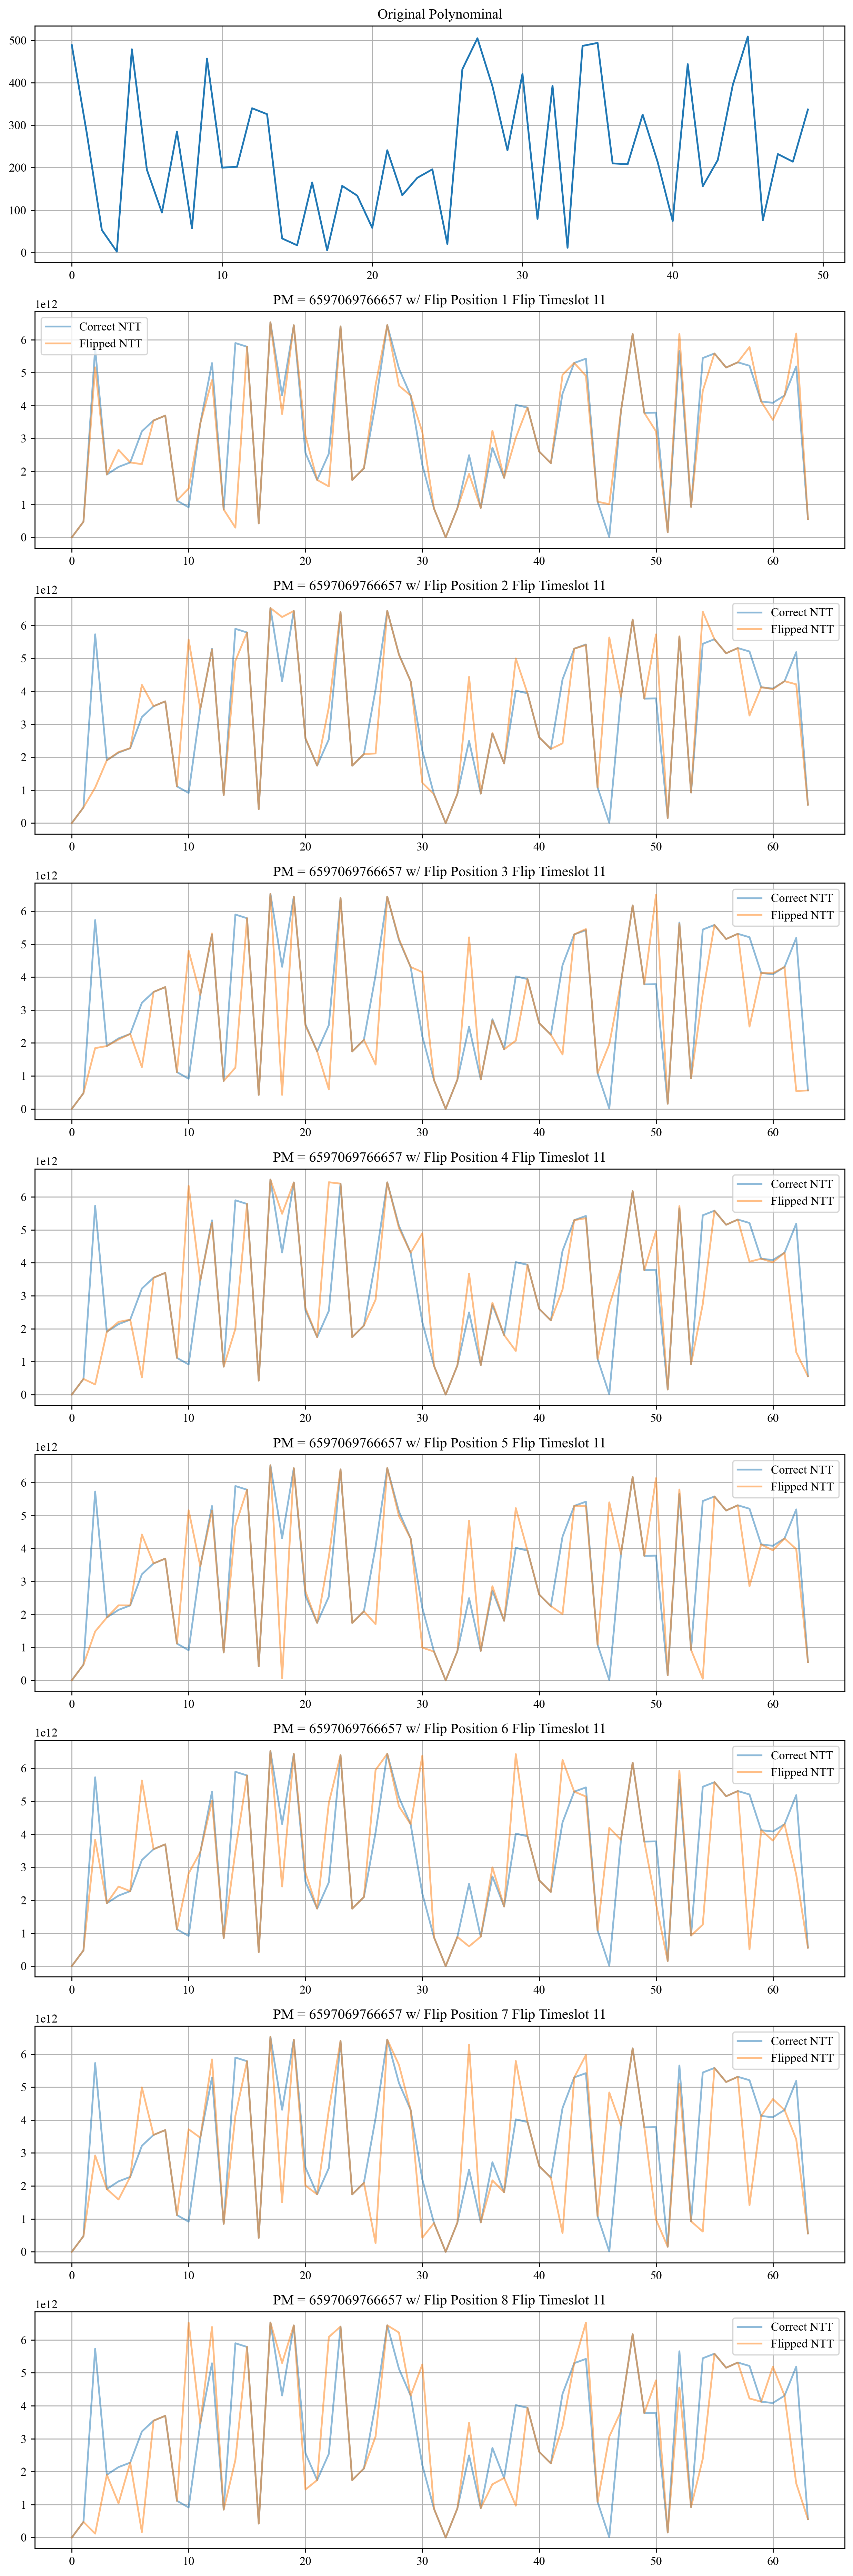

In [42]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
flip_pos = 8
flip_time = 11
PM = 3 * 2**41 + 1

fig, ax = plt.subplots(flip_pos + 1, dpi=250, figsize=[10,3*flip_time_scale])
ax[0].set_title('Original Polynominal')
ax[0].plot(polynominal_seq)
ax[0].grid()
for i in range(1,flip_pos+1):
    ax[i].set_title('PM = {} w/ Flip Position {} Flip Timeslot {}'.format(PM, i, flip_time))
    ax[i].grid()
    ax[i].plot(number_theoretic_transform(polynominal_seq, PM, log = False), label = 'Correct NTT', alpha=0.5)
    ax[i].plot(flip_index_ntt(polynominal_seq, PM, i, flip_time,log=False), label = 'Flipped NTT', alpha=0.5)
    ax[i].legend()
plt.tight_layout()
plt.savefig('Flip-Pos-View-Time{}'.format(flip_time))